## Importar librerias

In [572]:
import pandas as pd
import pyodbc
import sqlite3
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

In [573]:
# -------------------------
# CONFIGURACIÓN DE CONEXIONES
# -------------------------

# Conexión a Azure SQL Database
AZURE_SERVER = 'uaxmathfis.database.windows.net'
AZURE_DATABASE = 'usecases'
AZURE_DRIVER = '{ODBC Driver 17 for SQL Server}'
azure_conn_str = f"DRIVER={AZURE_DRIVER};SERVER={AZURE_SERVER};DATABASE={AZURE_DATABASE};Authentication=ActiveDirectoryInteractive"
conn = pyodbc.connect(azure_conn_str)

In [574]:
# Ejecutar consulta
query = "SELECT * FROM [DATAEX].[IA_Client_segment_MODIFICADO]"
df = pd.read_sql_query(query, conn)

# Exportar a CSV
df.to_csv("IA_Client.csv", index=False)

# Cerrar la conexión
conn.close()

C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\3354805586.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [575]:
df = pd.read_csv("IA_Client.csv", sep=",", encoding="utf-8")
df

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385.0,80,True,195,NaN
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052.0,50,True,360,5.0
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717.0,30,False,407,3.0
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606.0,30,False,544,4.0
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346.0,30,True,170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,F,Si,76,No,Servicios,+20annos,Alto,2,1948,Generacion X,33389,Toledo,1424.0,30,True,106,NaN
10802,CLI9996,F,No,44,Si,Funcionario,+20annos,Bajo,1,1980,Generacion X,76067,Cordoba,1514.0,50,False,257,NaN
10803,CLI9997,M,Si,47,Si,Ejecutivo,+20annos,Alto,3,1977,Generacion X,61300,Lugo,1385.0,80,True,347,5.0
10804,CLI9998,M,Si,40,Si,Artista,10-20annos,Alto,3,1984,Millennials,106015,Cuenca,1974.0,30,False,582,1.0


In [576]:
df.dtypes

ID                            object
Genero                        object
Casado                        object
Edad                           int64
Graduado                      object
Profesion                     object
Experiencia_laboral           object
Gastoscore                    object
Family_Size                    int64
anno_nacimiento                int64
Generacion                    object
Ingresos_anuales_brutos        int64
Provincia                     object
Digital_encuesta             float64
Gasto_medio_mensual_cuota      int64
Abandono                        bool
Dias_cliente                   int64
Campanna_anno                float64
dtype: object

In [577]:
df.isnull().sum()

ID                              0
Genero                          0
Casado                        190
Edad                            0
Graduado                      103
Profesion                       0
Experiencia_laboral             0
Gastoscore                      0
Family_Size                     0
anno_nacimiento                 0
Generacion                      0
Ingresos_anuales_brutos         0
Provincia                       0
Digital_encuesta                0
Gasto_medio_mensual_cuota       0
Abandono                        0
Dias_cliente                    0
Campanna_anno                5707
dtype: int64

In [578]:
df['Campanna_anno'] = df['Campanna_anno'].fillna(0)
df

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385.0,80,True,195,0.0
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052.0,50,True,360,5.0
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717.0,30,False,407,3.0
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606.0,30,False,544,4.0
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346.0,30,True,170,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,F,Si,76,No,Servicios,+20annos,Alto,2,1948,Generacion X,33389,Toledo,1424.0,30,True,106,0.0
10802,CLI9996,F,No,44,Si,Funcionario,+20annos,Bajo,1,1980,Generacion X,76067,Cordoba,1514.0,50,False,257,0.0
10803,CLI9997,M,Si,47,Si,Ejecutivo,+20annos,Alto,3,1977,Generacion X,61300,Lugo,1385.0,80,True,347,5.0
10804,CLI9998,M,Si,40,Si,Artista,10-20annos,Alto,3,1984,Millennials,106015,Cuenca,1974.0,30,False,582,1.0


In [579]:
df = df.dropna(subset=['Graduado', 'Casado'])
df.isnull().sum()

ID                           0
Genero                       0
Casado                       0
Edad                         0
Graduado                     0
Profesion                    0
Experiencia_laboral          0
Gastoscore                   0
Family_Size                  0
anno_nacimiento              0
Generacion                   0
Ingresos_anuales_brutos      0
Provincia                    0
Digital_encuesta             0
Gasto_medio_mensual_cuota    0
Abandono                     0
Dias_cliente                 0
Campanna_anno                0
dtype: int64

## Standar Scaler, Label Encoder, One Hot Encoder

In [580]:
df['Provincia'].unique()

array(['Segovia', 'Alicante', 'Toledo', 'Leon', 'LLeida', 'Ciudad Real',
       'i\x81vila', 'Guipiºzcoa', 'Vizcaya', 'Orense', 'Castellon',
       'Pontevedra', 'Almeri\xada', 'Valladolid', 'Jaen', 'Lugo',
       'Santa Cruz de Tenerife', 'Albacete', 'Huelva', 'Salamanca',
       'Ceuta', 'Baleares', 'Gerona', 'Barcelona', 'Sevilla',
       'Guadalajara', 'Soria', 'Caceres', 'Madrid', 'Cordoba', 'Burgos',
       'Navarra', 'Melilla', 'Granada', 'Badajoz', 'Valencia',
       'Tarragona', 'La Corui±a', 'Las Palmas', 'Murcia', 'Palencia',
       'La Rioja', 'Teruel', 'Zamora', 'Zaragoza', 'i\x81lava', 'Cuenca',
       'Huesca', 'Cadiz', 'Malaga'], dtype=object)

In [581]:
# Diccionario que mapea cada Comunidad Autónoma con las provincias (exactamente como aparecen en la lista)
comunidades = {
    'Andalucía': ['Almeri\xada', 'Jaen', 'Huelva', 'Sevilla', 'Cordoba', 'Granada', 'Cadiz', 'Malaga'],
    'Aragón': ['Huesca', 'Teruel', 'Zaragoza'],
    'Castilla-La Mancha': ['Toledo', 'Ciudad Real', 'Albacete', 'Guadalajara', 'Cuenca'],
    'Castilla y León': ['Segovia', 'Leon', 'i\x81vila', 'Valladolid', 'Salamanca', 'Soria', 'Palencia', 'Burgos', 'Zamora'],
    'Cataluña': ['LLeida', 'Gerona', 'Barcelona', 'Tarragona'],
    'Extremadura': ['Caceres', 'Badajoz'],
    'Galicia': ['Orense', 'Pontevedra', 'Lugo', 'La Corui±a'],
    'Comunidad Valenciana': ['Alicante', 'Castellon', 'Valencia'],
    'Comunidad de Madrid': ['Madrid'],
    'Navarra': ['Navarra'],
    'País Vasco': ['Guipiºzcoa', 'Vizcaya', 'i\x81lava'],
    'Baleares': ['Baleares'],
    'Canarias': ['Santa Cruz de Tenerife', 'Las Palmas'],
    'Murcia': ['Murcia'],
    'La Rioja': ['La Rioja'],
    'Ceuta': ['Ceuta'],
    'Melilla': ['Melilla']
}

In [582]:
def assign_communidad(region):
    # Se asume que en 'region' las provincias están separadas por ';'
    provincias = [provincia.strip() for provincia in region.split(';')]
    communidades = set()
    
    for province in provincias:
        for community, provinces_list in comunidades.items():
            if province in provinces_list:
                communidades.add(community)
    
    # Devolver la lista de comunidades como cadena, separadas por coma
    return ', '.join(communidades) if communidades else None

# Aplicamos la función a la columna que contenga las provincias y creamos una nueva columna
df['comunidad'] = df['Provincia'].apply(assign_communidad)

C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\4163525337.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comunidad'] = df['Provincia'].apply(assign_communidad)


In [583]:
provincia_sin_comunidad = df[df['comunidad'].isnull()]['Provincia'].unique()

# Imprimimos los países que no tienen continente asignado
print("Provincias sin comunidad autónoma asignada:")
for country in provincia_sin_comunidad:
    print(country)

Provincias sin comunidad autónoma asignada:


In [584]:
df_null_continent = df[df['comunidad'].isnull()]

In [585]:
def assign_communidad(region):
    # Se asume que en 'region' las provincias están separadas por ';'
    provincias = [provincia.strip() for provincia in region.split(';')]
    communidades = set()
    
    for province in provincias:
        for community, provinces_list in comunidades.items():
            if province in provinces_list:
                communidades.add(community)
    
    # Devolver la lista de comunidades como cadena, separadas por coma
    return ', '.join(communidades) if communidades else None

In [586]:
df['comunidad'].str.split(',').explode().str.strip().unique()

array(['Castilla y León', 'Comunidad Valenciana', 'Castilla-La Mancha',
       'Cataluña', 'País Vasco', 'Galicia', 'Andalucía', 'Canarias',
       'Ceuta', 'Baleares', 'Extremadura', 'Comunidad de Madrid',
       'Navarra', 'Melilla', 'Murcia', 'La Rioja', 'Aragón'], dtype=object)

In [587]:
df.head(10)

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,comunidad
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385.0,80,True,195,0.0,Castilla y León
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052.0,50,True,360,5.0,Comunidad Valenciana
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717.0,30,False,407,3.0,Castilla-La Mancha
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606.0,30,False,544,4.0,Castilla y León
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346.0,30,True,170,0.0,Cataluña
5,CLI10002,M,Si,76,No,Artista,+20annos,Bajo,1,1948,Generacion X,88523,Ciudad Real,158.0,120,False,358,5.0,Castilla-La Mancha
6,CLI10003,M,Si,45,Si,Otros,+20annos,Bajo,5,1979,Generacion X,112808,ivila,939.0,30,False,442,3.0,Castilla y León
7,CLI10004,M,Si,36,No,Ejecutivo,10-20annos,Bajo,6,1988,Millennials,18885,Guipiºzcoa,824.0,30,False,124,0.0,País Vasco
8,CLI10005,M,No,30,Si,Funcionario,<10annos,Bajo,5,1994,Millennials,21358,Vizcaya,1675.0,30,False,70,0.0,País Vasco
9,CLI10006,M,Si,42,Si,Ingeniero,+20annos,Bajo,2,1982,Millennials,46283,Orense,1008.0,50,False,403,3.0,Galicia


In [588]:
# df.drop('Provincia', axis=1, inplace=True)

In [589]:
# Definir las columnas para One Hot Encoding
# onehot_cols = ['Profesion']

#for col in onehot_cols:
#    ohe = OneHotEncoder(sparse=False, drop='first')
#    encoded = ohe.fit_transform(df[[col]])
    # Crear nombres de las nuevas columnas (se omite la primera categoría por drop='first')
#    new_cols = [f"{col}_{cat}" for cat in ohe.categories_[0][1:]]
#    df_ohe = pd.DataFrame(encoded, columns=new_cols, index=df.index)
#    # Concatenar las columnas codificadas y eliminar la original
#    df = pd.concat([df.drop(col, axis=1), df_ohe], axis=1)

#print("One Hot Encoding completado. Nuevas columnas:")
#print(df.columns)


In [590]:



# Lista de columnas para Label Encoding
label_cols = ['Genero', 'Casado', 'Graduado', 'Digital_encuesta', 'Abandono', 'Generacion', 'Campanna_anno', 'Profesion', 'comunidad', 'Provincia']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df

C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\2131571943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\2131571943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\2131571943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,comunidad
0,CLI10,0,1,67,1,4,+20annos,Bajo,3,1957,1,93442,37,90,80,1,195,0,4
1,CLI100,1,1,64,1,5,+20annos,Medio,2,1960,1,99774,1,58,50,1,360,4,8
2,CLI1000,1,1,65,1,0,+20annos,Medio,3,1959,1,36756,42,122,30,0,407,2,5
3,CLI10000,1,0,33,0,3,10-20annos,Bajo,4,1991,3,24616,25,110,30,0,544,3,4
4,CLI10001,1,1,52,0,7,+20annos,Medio,2,1972,1,29834,21,85,30,1,170,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,0,1,76,0,8,+20annos,Alto,2,1948,1,33389,42,94,30,1,106,0,5
10802,CLI9996,0,0,44,1,3,+20annos,Bajo,1,1980,1,76067,12,103,50,0,257,0,0
10803,CLI9997,1,1,47,1,2,+20annos,Alto,3,1977,1,61300,26,90,80,1,347,4,11
10804,CLI9998,1,1,40,1,0,10-20annos,Alto,3,1984,3,106015,13,143,30,0,582,1,5


In [591]:
import re
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Función para extraer el primer número encontrado en una cadena
def extract_number(value):
    match = re.search(r'\d+', str(value))
    return float(match.group()) if match else None

# Aplicar la función a la columna problemática, por ejemplo, 'Experiencia_laboral'
df['Experiencia_laboral'] = df['Experiencia_laboral'].apply(extract_number)

# Ahora, si existen otras columnas en scale_cols que puedan tener valores similares, repite el proceso o usa la opción 2.

# Lista de columnas numéricas a escalar
scale_cols = ['Edad', 'Family_Size', 'anno_nacimiento', 'Experiencia_laboral',
              'Ingresos_anuales_brutos', 'Gasto_medio_mensual_cuota', 'Dias_cliente']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


df

C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\4047192731.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experiencia_laboral'] = df['Experiencia_laboral'].apply(extract_number)
C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\4047192731.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scale_cols] = scaler.fit_transform(df[scale_cols])


,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,comunidad
0,CLI10,0,1,1.036719,1,4,0.846560,Bajo,0.153473,-1.036493,1,1.052557,37,90,1.226055,1,-0.692744,0,4
1,CLI100,1,1,0.873632,1,5,0.846560,Medio,-0.493513,-0.873404,1,1.231266,1,58,0.170131,1,0.416626,4,8
2,CLI1000,1,1,0.927994,1,0,0.846560,Medio,0.153473,-0.927767,1,-0.547295,42,122,-0.533818,0,0.732628,2,5
3,CLI10000,1,0,-0.811600,0,3,-1.181251,Bajo,0.800459,0.811856,3,-0.889922,25,110,-0.533818,0,1.653741,3,4
4,CLI10001,1,1,0.221284,0,7,0.846560,Medio,-0.493513,-0.221045,1,-0.742655,21,85,-0.533818,1,-0.860830,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,0,1,1.525980,0,8,0.846560,Alto,-0.493513,-1.525762,1,-0.642322,42,94,-0.533818,1,-1.291131,0,5
10802,CLI9996,0,0,-0.213614,1,3,0.846560,Bajo,-1.140499,0.213861,1,0.562182,12,103,0.170131,0,-0.275890,0,0
10803,CLI9997,1,1,-0.050527,1,2,0.846560,Alto,0.153473,0.050771,1,0.145412,26,90,1.226055,1,0.329221,4,11
10804,CLI9998,1,1,-0.431063,1,0,-1.181251,Alto,0.153473,0.431314,3,1.407406,13,143,-0.533818,0,1.909232,1,5


In [592]:
# Definir columnas ordinales y el orden de categorías para cada una
ordinal_cols = ['Gastoscore']
categories = [
    ['Bajo', 'Medio', 'Alto']
]

ord_encoder = OrdinalEncoder(categories=categories)
df[ordinal_cols] = ord_encoder.fit_transform(df[ordinal_cols])

print("Ordinal Encoding completado. Ejemplo de datos:")
print(df[ordinal_cols].head())

Ordinal Encoding completado. Ejemplo de datos:
   Gastoscore
0         0.0
1         1.0
2         1.0
3         0.0
4         1.0


C:\Users\jaal2\AppData\Local\Temp\ipykernel_9108\4155049164.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ordinal_cols] = ord_encoder.fit_transform(df[ordinal_cols])


In [593]:
df.head(5)

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,comunidad
0,CLI10,0,1,1.036719,1,4,0.846560,0.0,0.153473,-1.036493,1,1.052557,37,90,1.226055,1,-0.692744,0,4
1,CLI100,1,1,0.873632,1,5,0.846560,1.0,-0.493513,-0.873404,1,1.231266,1,58,0.170131,1,0.416626,4,8
2,CLI1000,1,1,0.927994,1,0,0.846560,1.0,0.153473,-0.927767,1,-0.547295,42,122,-0.533818,0,0.732628,2,5
3,CLI10000,1,0,-0.811600,0,3,-1.181251,0.0,0.800459,0.811856,3,-0.889922,25,110,-0.533818,0,1.653741,3,4
4,CLI10001,1,1,0.221284,0,7,0.846560,1.0,-0.493513,-0.221045,1,-0.742655,21,85,-0.533818,1,-0.860830,0,6


## PCA

'Edad', 'Experiencia_laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Ingresos_anuales_brutos', 'Digital_encuesta', 'Gasto_medio_mensual_cuota'

In [594]:
# Seleccionar solo las columnas numéricas (excluyendo ID y categóricas ya codificadas)
variables_continuas = ['Ingresos_anuales_brutos', "anno_nacimiento", "Generacion", "Family_Size",
                'Gasto_medio_mensual_cuota', 'Dias_cliente', 'Experiencia_laboral', 'Gastoscore', ]

Variables_binarias = ['Genero']

X = df[variables_continuas + Variables_binarias]
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes principales: {pca.n_components_}")

Número de componentes principales: 2


In [595]:
# Verifica la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")

Varianza explicada por cada componente: [0.44692997 0.1278978 ]
Varianza total explicada: 0.5748277773790518


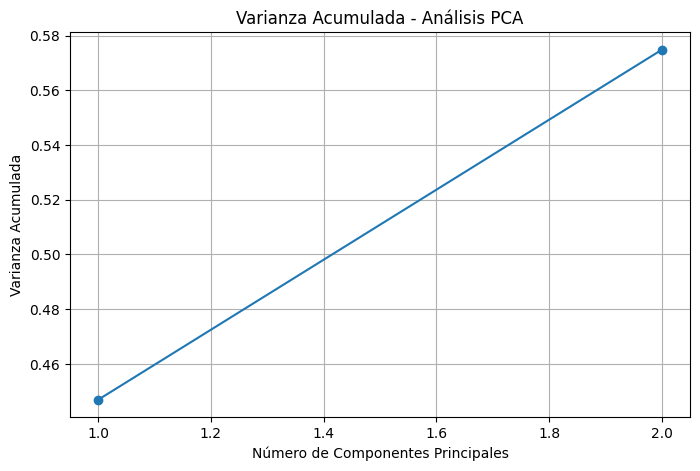

In [596]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

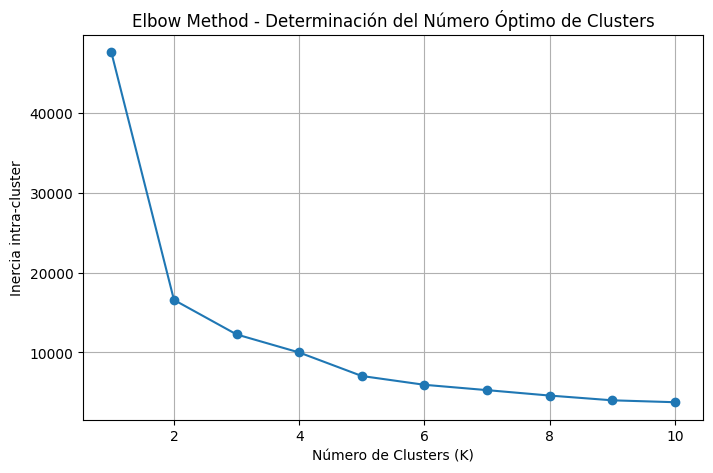

In [597]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

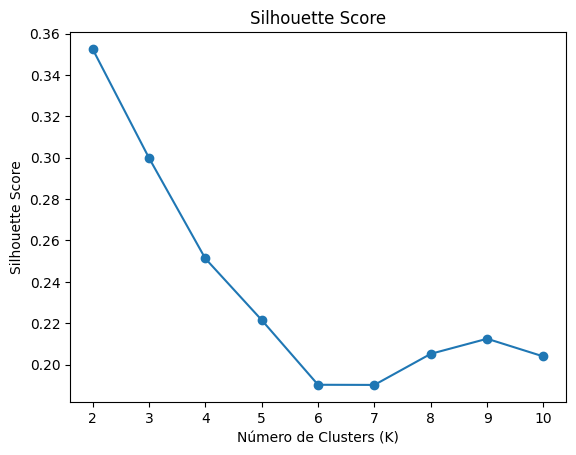

In [598]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [599]:
clusters = 5 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 5


In [600]:
df = df.copy()  # Hacer una copia del DataFrame original para evitar problemas de referencia.
kmeans = KMeans(n_clusters=clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

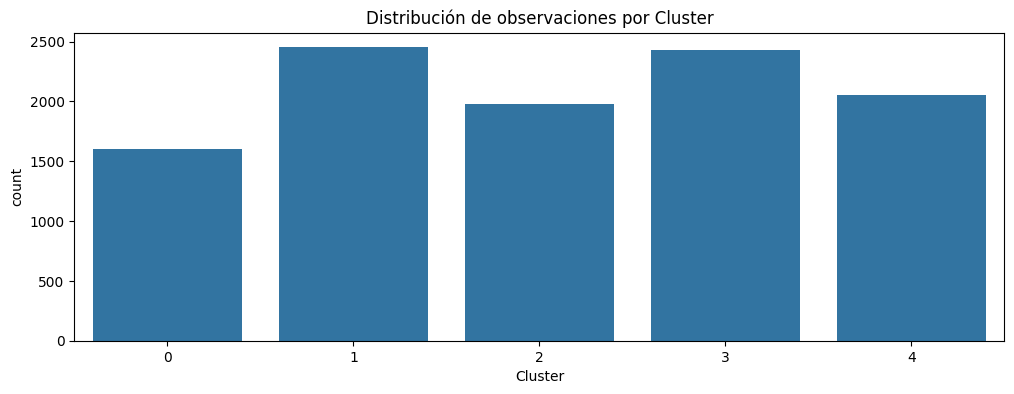

In [601]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Distribución de observaciones por Cluster')
plt.show()

In [602]:
print(pca.explained_variance_ratio_)

[0.44692997 0.1278978 ]


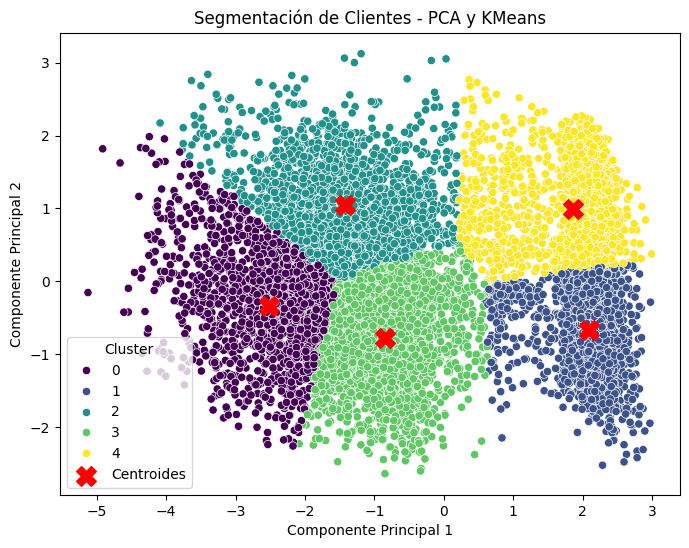

In [603]:
# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title("Segmentación de Clientes - PCA y KMeans")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

In [604]:
# Calculamos la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Sumamos la varianza de los dos primeros componentes
var_total_2componentes = varianza_explicada[0] + varianza_explicada[1]

print(f"Varianza explicada por los 2 primeros componentes: {var_total_2componentes:.4f} ({var_total_2componentes*100:.2f}%)")

Varianza explicada por los 2 primeros componentes: 0.5748 (57.48%)


In [605]:
print(pca.explained_variance_ratio_)

[0.44692997 0.1278978 ]


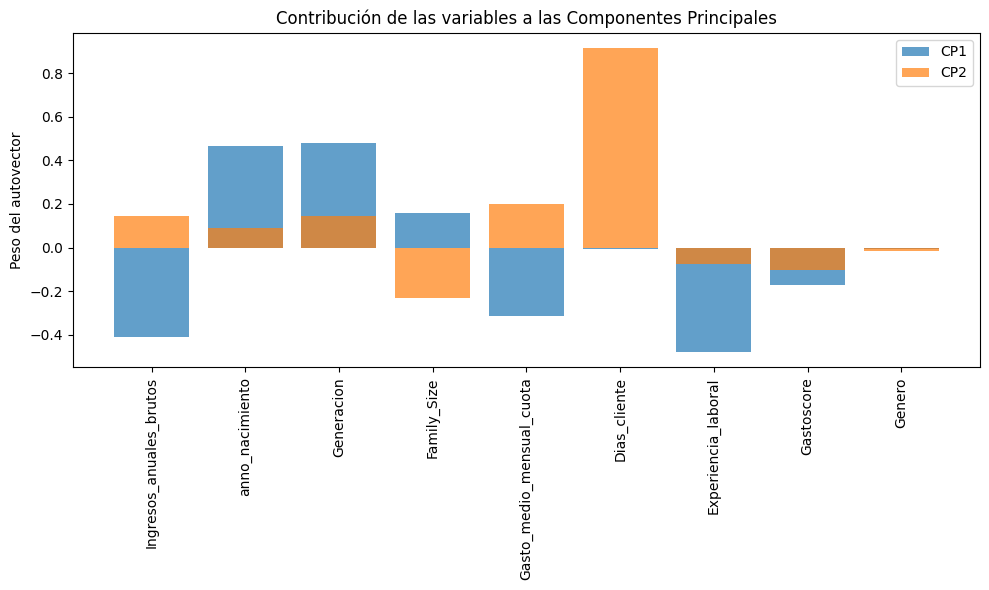

In [606]:
# Gráfico 2: Autovectores (componentes principales)
components = pca.components_
# Obtener los nombres reales de las variables desde X
features = X.columns.tolist()

plt.figure(figsize=(10,6))
plt.bar(range(1, len(components[0])+1), components[0], alpha=0.7, label='CP1')
plt.bar(range(1, len(components[1])+1), components[1], alpha=0.7, label='CP2')
plt.xticks(range(1, len(features)+1), features, rotation=90)
plt.ylabel("Peso del autovector")
plt.title("Contribución de las variables a las Componentes Principales")
plt.legend()
plt.tight_layout()
plt.show()

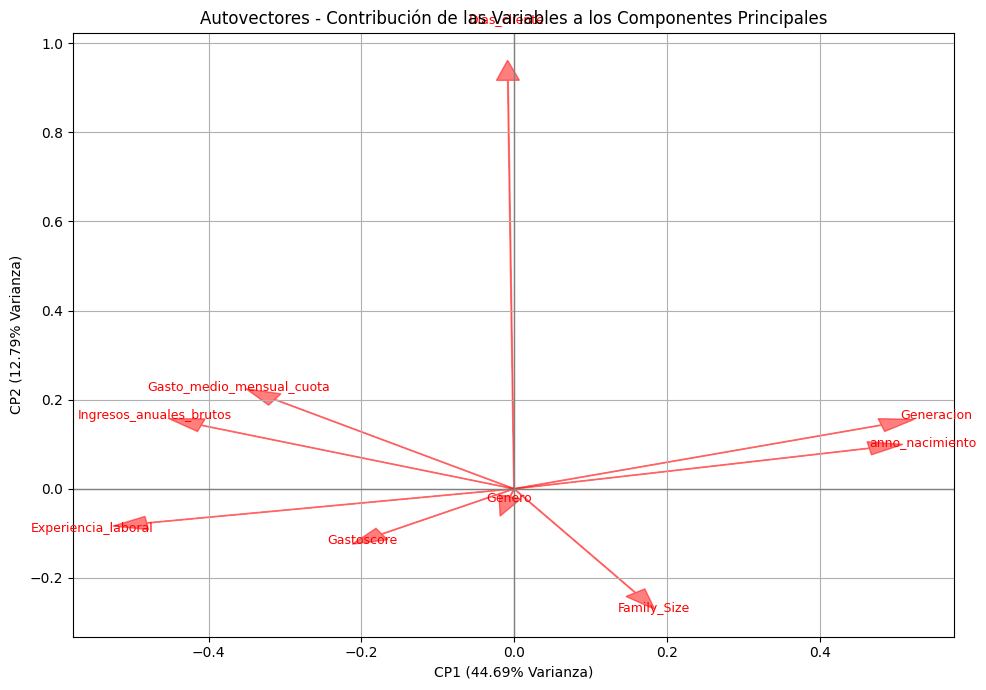

In [607]:
# Autovectores del PCA
components = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100  # porcentaje de varianza explicada

# Usar los nombres reales de las columnas del dataset X
features = np.array(X.columns.tolist())

plt.figure(figsize=(10, 7))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Dibujar los vectores (autovectores) con nombres reales
for i in range(len(features)):
    plt.arrow(0, 0, components[0, i], components[1, i],
              color='r', alpha=0.5, head_width=0.03)
    plt.text(components[0, i] * 1.15, components[1, i] * 1.15,
             features[i], color='r', ha='center', va='center', fontsize=9)

plt.xlabel(f"CP1 ({explained_variance[0]:.2f}% Varianza)")
plt.ylabel(f"CP2 ({explained_variance[1]:.2f}% Varianza)")
plt.title("Autovectores - Contribución de las Variables a los Componentes Principales")
plt.grid()
plt.tight_layout()
plt.show()


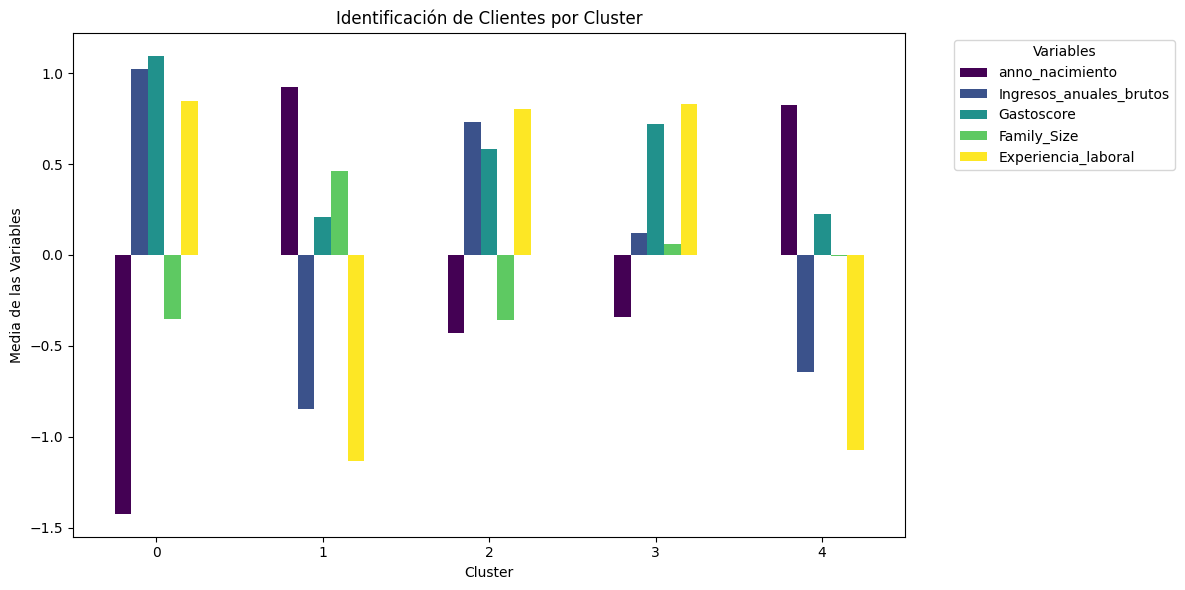

In [608]:
# Crear un DataFrame con las medias de las variables seleccionadas por cluster
cluster_means = df.groupby('Cluster')[['anno_nacimiento', 'Ingresos_anuales_brutos', 'Gastoscore', 'Family_Size', 'Experiencia_laboral']].mean()

# Crear la gráfica de barras
cluster_means.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Identificación de Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Media de las Variables')
plt.xticks(rotation=0)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [609]:
df

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,comunidad,Cluster
0,CLI10,0,1,1.036719,1,4,0.846560,0.0,0.153473,-1.036493,1,1.052557,37,90,1.226055,1,-0.692744,0,4,0
1,CLI100,1,1,0.873632,1,5,0.846560,1.0,-0.493513,-0.873404,1,1.231266,1,58,0.170131,1,0.416626,4,8,2
2,CLI1000,1,1,0.927994,1,0,0.846560,1.0,0.153473,-0.927767,1,-0.547295,42,122,-0.533818,0,0.732628,2,5,3
3,CLI10000,1,0,-0.811600,0,3,-1.181251,0.0,0.800459,0.811856,3,-0.889922,25,110,-0.533818,0,1.653741,3,4,4
4,CLI10001,1,1,0.221284,0,7,0.846560,1.0,-0.493513,-0.221045,1,-0.742655,21,85,-0.533818,1,-0.860830,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,0,1,1.525980,0,8,0.846560,2.0,-0.493513,-1.525762,1,-0.642322,42,94,-0.533818,1,-1.291131,0,5,3
10802,CLI9996,0,0,-0.213614,1,3,0.846560,0.0,-1.140499,0.213861,1,0.562182,12,103,0.170131,0,-0.275890,0,0,3
10803,CLI9997,1,1,-0.050527,1,2,0.846560,2.0,0.153473,0.050771,1,0.145412,26,90,1.226055,1,0.329221,4,11,2
10804,CLI9998,1,1,-0.431063,1,0,-1.181251,2.0,0.153473,0.431314,3,1.407406,13,143,-0.533818,0,1.909232,1,5,4


In [610]:
df = pd.read_csv("IA_Client.csv", sep=",", encoding="utf-8")
df

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385.0,80,True,195,NaN
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052.0,50,True,360,5.0
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717.0,30,False,407,3.0
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606.0,30,False,544,4.0
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346.0,30,True,170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,F,Si,76,No,Servicios,+20annos,Alto,2,1948,Generacion X,33389,Toledo,1424.0,30,True,106,NaN
10802,CLI9996,F,No,44,Si,Funcionario,+20annos,Bajo,1,1980,Generacion X,76067,Cordoba,1514.0,50,False,257,NaN
10803,CLI9997,M,Si,47,Si,Ejecutivo,+20annos,Alto,3,1977,Generacion X,61300,Lugo,1385.0,80,True,347,5.0
10804,CLI9998,M,Si,40,Si,Artista,10-20annos,Alto,3,1984,Millennials,106015,Cuenca,1974.0,30,False,582,1.0
